In [9]:
import numpy as np
import pandas as pd

file_path = '/home/shiftpub/AMM-Python/results/dummy_results/newa_results_spread_0.01_dt_0.0003_20241001_222636.csv'
results = pd.read_csv(file_path)
print(results.shape)
print(results.columns)
print(f"unique sigma: {results['sigma'].unique()}")
unique_fee_rate = results['fee_rate'].unique()
print(f"unique fee_rate: {len(unique_fee_rate)}")
print(f"max fee rate {max(unique_fee_rate)}")
print(f"min fee rate {min(unique_fee_rate)}")

(2520000, 8)
Index(['sigma', 'fee_rate', 'pnl', 'fee', 'volume', 'price_distance',
       'dynamic_fee', 'total_transactions'],
      dtype='object')
unique sigma: [0.001 0.005 0.01  0.05  0.1   0.5  ]
unique fee_rate: 40
max fee rate 0.02
min fee rate 0.0005


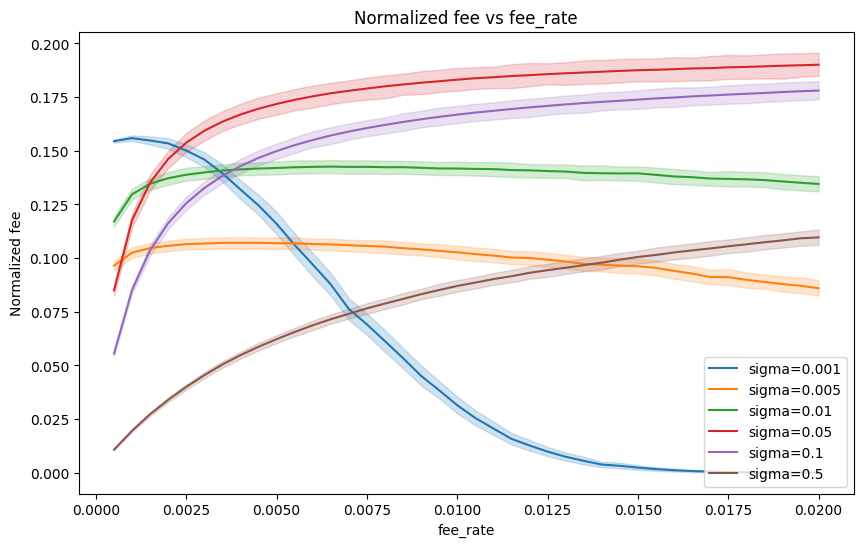

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Min-max normalization function
def min_max_normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# select the first last and middle sigma values
unique_sigma = results['sigma'].unique()
# unique_sigma = [unique_sigma[0], unique_sigma[-1], unique_sigma[len(unique_sigma) // 2]]

plt.figure(figsize=(10, 6))

# Loop through each sigma value
for sigma in unique_sigma:
    df = results[results['sigma'] == sigma].copy()  # Ensure a copy to avoid warnings
    df['fee_normalized'] = min_max_normalize(df['fee'])  # Normalize the 'fee' column
    sns.lineplot(x='fee_rate', y='fee_normalized', data=df, label=f'sigma={sigma}')
    
plt.xlabel('fee_rate')
plt.ylabel('Normalized fee')
plt.title('Normalized fee vs fee_rate')
plt.legend()
plt.show()
